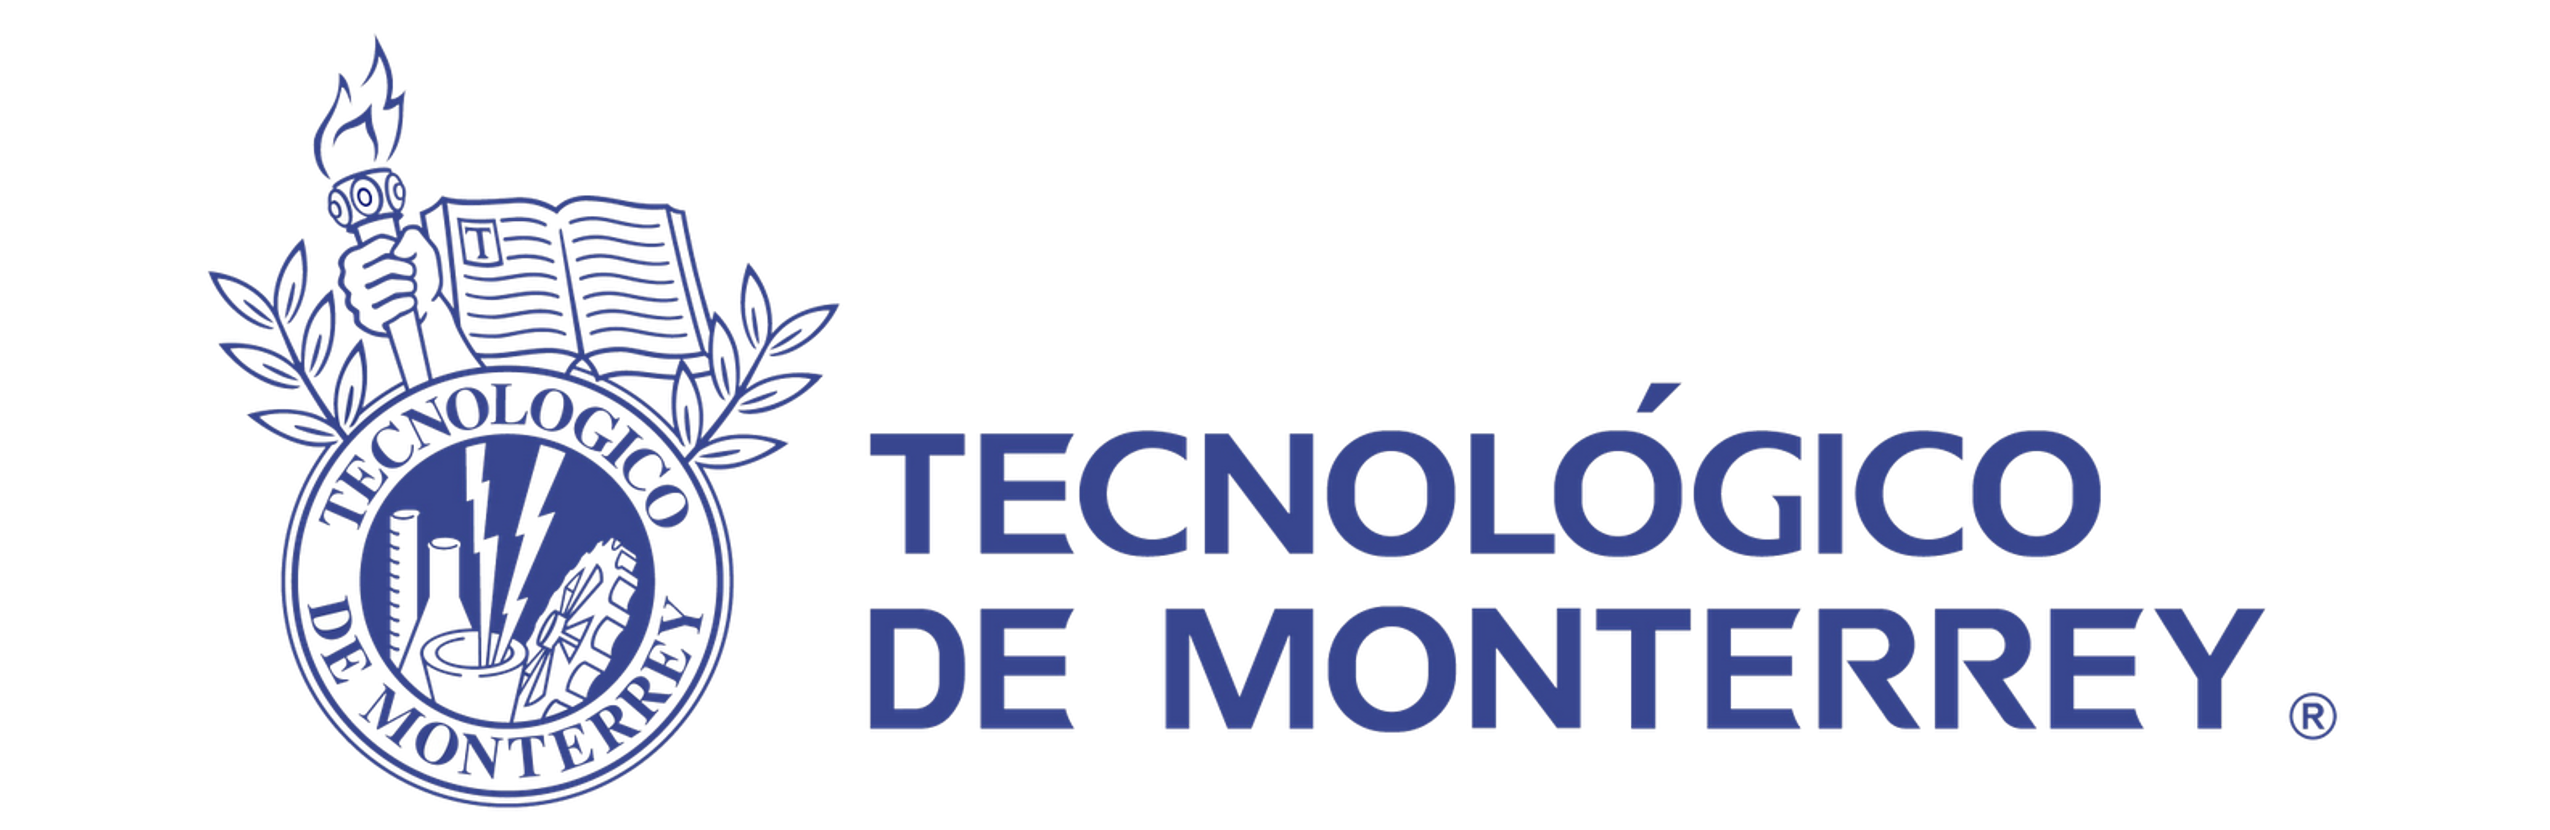

## TC5035 Proyecto integrador
### Tecnológico de Monterrey
#### Dra. Grettel Barceló Alonso
#### Dr. Luis Eduardo Falcón Morales

___


## Equipo 09

### Segmentación de audiencias y detección de respuesta emocional para anuncios digitales exteriores

Integrantes

> - Enrique Hernández García A01793727
> - Alejandro Tomás Mackey A01164338
> - Francisco Javier Parga García A01794380

# Avance 1
## Análisis exploratorio de datos

- Objetivo

    2.1 Elegir las características más relevantes para reducir la dimensionalidad y aumentar la capacidad de generalización del modelo.

    2.2 Abordar y corregir los problemas identificados en los datos.


# Reposiotorio
https://github.com/fco-parga/mna_proyecto_integrador_eq09/

EDA: https://github.com/fco-parga/mna_proyecto_integrador_eq09/blob/main/code/notebooks/EDA/Avance1.09.pdf

# Carga de datos

In [1]:
import os
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 50)

In [2]:
data_path = '../../../data/'

In [3]:
# Archivo con conteos iniciales
raw_csv = 'raw/counts_30min.csv'

raw_data_file = os.path.join(data_path, raw_csv)

raw_df = pd.read_csv(raw_data_file, index_col=0, low_memory=False)
raw_df.head(5)

event_timestamp country_code country_name city_code  \
0  2024-04-14 01:14:20.216944+00:00           MX       Mexico    MX-CMX   
1  2024-04-14 01:32:41.359175+00:00           MX       Mexico    MX-CMX   
2  2024-04-14 02:11:06.906063+00:00           MX       Mexico    MX-CMX   
3  2024-04-14 02:45:35.383399+00:00           MX       Mexico    MX-CMX   
4  2024-04-14 03:19:58.561536+00:00           MX       Mexico    MX-CMX   

     city_name  zip_code       lat       lon  cam_id         cam_name  people  \
0  Mexico City    9460.0  19.36487 -99.13421     1.0  cafe calaverita       1   
1  Mexico City    9460.0  19.36487 -99.13421     1.0  cafe calaverita       6   
2  Mexico City    9460.0  19.36487 -99.13421     1.0  cafe calaverita       3   
3  Mexico City    9460.0  19.36487 -99.13421     1.0  cafe calaverita       3   
4  Mexico City    9460.0  19.36487 -99.13421     1.0  cafe calaverita       2   

                                        storage_blob  
0  MX/cafe calaverita/2024-04-13 19:14:20.216944-...  
1  MX/cafe calaverita/2024-04-13 19:32:41.359175-...  
2  MX/cafe calaverita/2024-04-13 20:11:06.906063-...  
3  MX/cafe calaverita/2024-04-13 20:45:35.383399-...  
4  MX/cafe calaverita/2024-04-13 21:19:58.561536-...

# Revisión de datos crudos

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 524
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_timestamp  525 non-null    object 
 1   country_code     525 non-null    object 
 2   country_name     182 non-null    object 
 3   city_code        182 non-null    object 
 4   city_name        182 non-null    object 
 5   zip_code         182 non-null    float64
 6   lat              525 non-null    float64
 7   lon              525 non-null    float64
 8   cam_id           182 non-null    float64
 9   cam_name         525 non-null    object 
 10  people           525 non-null    int64  
 11  storage_blob     525 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 53.3+ KB


Este DataFrame contiene 525 entradas y 12 columnas. Cada entrada está indexada por un evento con un sello de tiempo (event_timestamp). 

La información geográfica se proporciona a través de códigos y nombres de países (country_code, country_name), códigos y nombres de ciudades (city_code, city_name), así como coordenadas de latitud (lat) y longitud (lon). 

Solo una parte de las entradas tiene información completa sobre la ubicación (182 de 525), lo que se refleja en los campos de nombre y código de país, ciudad y código postal (zip_code). En embargo, en este dataset solo se tiene 1 cámara por lo que esos campos no tienen variabilidad.

## Revisión de datos por columna

In [5]:
for column in raw_df.columns[1:-1]:
    print(raw_df[column].value_counts(), '\n')

country_code
MX    525
Name: count, dtype: int64 

country_name
Mexico    182
Name: count, dtype: int64 

city_code
MX-CMX    182
Name: count, dtype: int64 

city_name
Mexico City    182
Name: count, dtype: int64 

zip_code
9460.0    182
Name: count, dtype: int64 

lat
19.36487    525
Name: count, dtype: int64 

lon
-99.13421    525
Name: count, dtype: int64 

cam_id
1.0    182
Name: count, dtype: int64 

cam_name
cafe calaverita    525
Name: count, dtype: int64 

people
3     100
2      89
1      83
4      66
5      61
0      43
6      35
7      19
8      18
10      6
9       5
Name: count, dtype: int64 



Dado que en este momento solo contamos con 1 cámara, la mayoría de las características muestran las características de la cámara “cafe calaverita” con el id=1

## Distribución de conteo

In [6]:
import matplotlib.pyplot as plt

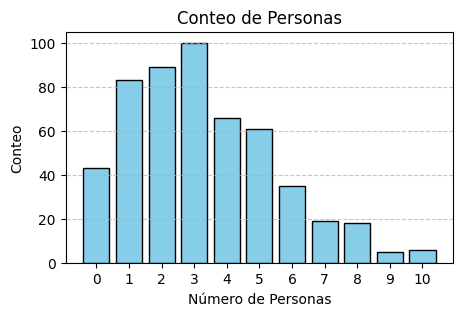

In [7]:
df_counts = pd.DataFrame(raw_df['people'].value_counts()).reset_index().sort_values('people').reset_index(drop=True)

# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(df_counts['people'], df_counts['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas')
plt.xlabel('Número de Personas')
plt.ylabel('Conteo')
plt.xticks(range(0, 11))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Observando la distribución del conteo de personas con el histograma, podemos identificar:
- **Distribución de Conteos:** La mayoría de los conteos se encuentran entre 2 y 5 personas, lo que sugiere que es más común encontrar grupos pequeños.
- **Pico Principal:** Hay un pico alrededor de 2 y 3 personas, indicando que estos son los conteos más frecuentes.
- **Tendencia General:** Después del pico en 3 personas, hay una tendencia decreciente, lo que significa que a medida que aumenta el número de personas, es menos probable que ocurran esos conteos.
- **Conteos Bajos y Altos:** Los conteos para 0, y más de 6 personas son menos frecuentes, lo que podría indicar que es raro encontrar momentos sin personas o con grupos grandes.

## Revisión visual de datos faltantes

In [8]:
import missingno as msno

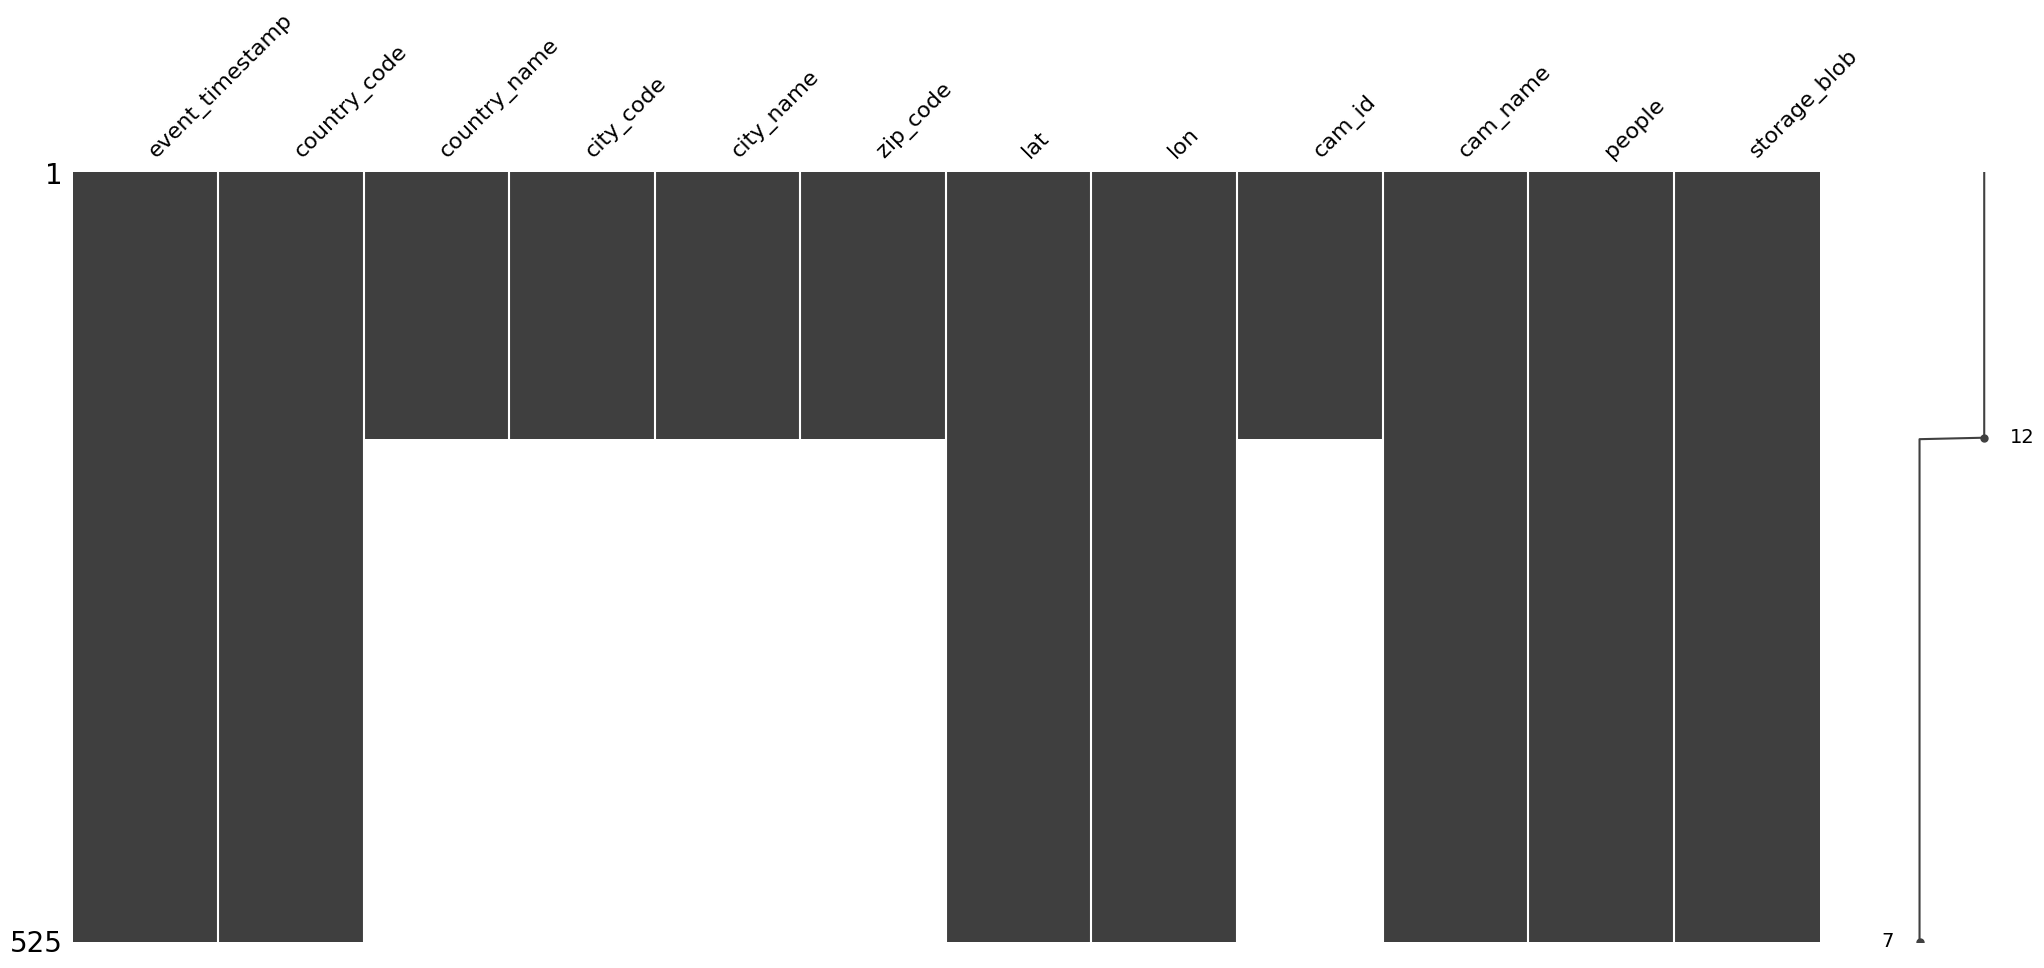

In [9]:
msno.matrix(raw_df)
plt.show()

Visualmente se observa que no todas las columnas tienen datos, como se identificó en la descripción del dataframe

# Convertir timestamp a datetime64

Convertir un timestamp en formato string a un tipo de dato datetime en Pandas es conveniente por varias razones:
- Manejo de fechas y horas: Los objetos datetime son específicos para manejar fechas y horas, permitiendo realizar operaciones como sumar o restar días o segundos de manera sencilla y directa.
- Funcionalidades específicas de Pandas: Pandas ofrece métodos específicos para trabajar con datos temporales, como resample para cambiar la frecuencia de los datos o rolling para calcular estadísticas móviles, que requieren que las fechas estén en formato datetime.

In [10]:
# Convertir a datetime 
raw_df['event_timestamp'] = pd.to_datetime(raw_df['event_timestamp'])

#Convertir de UTC a -6 hrs
raw_df['event_timestamp'] = raw_df['event_timestamp'].dt.tz_convert('America/Mexico_City')

# Asignar como índice
raw_df.set_index('event_timestamp', inplace=True)

raw_df.head(3)

country_code country_name city_code  \
event_timestamp                                                        
2024-04-13 19:14:20.216944-06:00           MX       Mexico    MX-CMX   
2024-04-13 19:32:41.359175-06:00           MX       Mexico    MX-CMX   
2024-04-13 20:11:06.906063-06:00           MX       Mexico    MX-CMX   

                                    city_name  zip_code       lat       lon  \
event_timestamp                                                               
2024-04-13 19:14:20.216944-06:00  Mexico City    9460.0  19.36487 -99.13421   
2024-04-13 19:32:41.359175-06:00  Mexico City    9460.0  19.36487 -99.13421   
2024-04-13 20:11:06.906063-06:00  Mexico City    9460.0  19.36487 -99.13421   

                                  cam_id         cam_name  people  \
event_timestamp                                                     
2024-04-13 19:14:20.216944-06:00     1.0  cafe calaverita       1   
2024-04-13 19:32:41.359175-06:00     1.0  cafe calaverita       6   
2024-04-13 20:11:06.906063-06:00     1.0  cafe calaverita       3   

                                                                       storage_blob  
event_timestamp                                                                      
2024-04-13 19:14:20.216944-06:00  MX/cafe calaverita/2024-04-13 19:14:20.216944-...  
2024-04-13 19:32:41.359175-06:00  MX/cafe calaverita/2024-04-13 19:32:41.359175-...  
2024-04-13 20:11:06.906063-06:00  MX/cafe calaverita/2024-04-13 20:11:06.906063-...

## Visualización de serie de tiempo

Para entender de forma cualitativa el comportamiento del volumen de clientes en la cafeteria, es de utilidad realizar visualizaciones de la serie de tiempos:

- Comprensión rápida: Los gráficos permiten una comprensión más rápida y clara de las tendencias y patrones en los datos temporales, en comparación con mirar tablas de números.
- Identificación de tendencias: Es más fácil identificar tendencias al alza o a la baja, estacionalidades y ciclos, así como puntos atípicos que podrían requerir una investigación adicional.
- Comunicación efectiva: Las visualizaciones son herramientas poderosas para comunicar información compleja de manera sencilla a un público amplio, incluyendo aquellos sin conocimientos técnicos.
- Análisis comparativo: Permite comparar series de tiempo de diferentes categorías o variables para ver cómo se relacionan entre sí a lo largo del tiempo.
- Toma de decisiones basada en datos: Facilita la toma de decisiones estratégicas basadas en datos históricos y proyecciones futuras.


*Referencfias*
>  Xu, T. L., de Barbaro, K., Abney, D. H., & Cox, R. F. A. (2020). Finding Structure in Time: Visualizing and Analyzing Behavioral Time Series. Frontiers in Psychology, 11, 172
> Shumway, R. H., & Stoffer, D. S. (2017). Time Series Analysis and Its Applications: With R Examples (4th ed.). Springer

In [11]:
import matplotlib.dates as mdates

In [12]:
def plot_df_counts(df, figsize=(13, 3), grouped=False, agg2plot=None, intervalo=''):
    """
    Genera un gráfico de líneas del conteo de personas a lo largo del tiempo.

    Parámetros:
    df (DataFrame): DataFrame de pandas que contiene los datos a graficar.
    figsize (tuple, opcional): Tamaño de la figura del gráfico.
    grouped (bool, opcional): Indica si los datos están agrupados por alguna métrica.
    agg2plot (str, opcional): Nombre de la columna agregada a graficar si los datos están agrupados.
    intervalo (str, opcional): Intervalo de tiempo de los datos para incluir en el título.

    Devuelve:
    None: Esta función no devuelve nada, solo muestra el gráfico.
    """

    # Configura el tamaño de la figura del gráfico
    plt.figure(figsize=figsize)
    
    # Grafica los datos agrupados o el conteo de personas por captura
    if grouped and agg2plot:
        plt.plot(df.index, df[agg2plot], '-o', markersize=2, label='Conteo')  
        metrica = agg2plot
    else:
        plt.plot(df.index, df['people'], '-o', markersize=2, label='Conteo')   
        plt.plot(df.index, np.zeros(df.shape[0]), 'o', markersize=2, color='darkgreen', label='Capturas')  
        metrica = 'por captura'
    
    # Configura el formato de las etiquetas del eje x para fechas
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    
    # Ajusta la orientación de las etiquetas de fecha
    plt.gcf().autofmt_xdate()
    
    # Establece las etiquetas y el título del gráfico
    plt.xlabel('Fecha')
    plt.ylabel('Número de personas')
    titulo = f'Conteo de personas ({metrica}) {intervalo}'
    plt.title(titulo)
    
    # Activa la grilla para mejor visualización
    plt.grid(True)
    # Muestra la leyenda del gráfico
    plt.legend()
    
    # Muestra el gráfico
    plt.show()

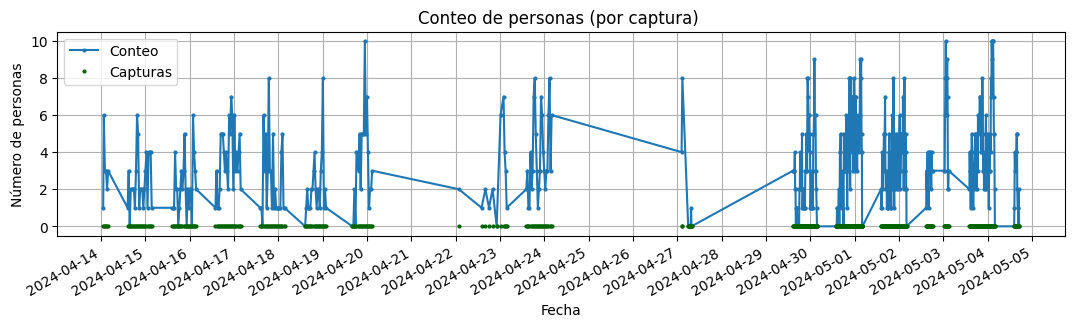

In [13]:
plot_df_counts(raw_df)

En este gráfico se muestra el conteo de personas por captura cada 30 minutos aproximadamente. 

La **<span style="color:blue">línea azul</span>** representa el conteo instantáneo de la captura, mientras que los **<span style="color:green">puntos verdes</span>** representan la hora de la captura.

En el dato que tenemos disponible se observan variaciones a lo largo de cada día, así como un aumento de clientes en los últimos días.

Así mismo, dado que las capturas sólo se realizan en el horario de apertura, se identifican los espacios muertos.

Con este mismo indicador, se aprecia variaciones en las capturas, las cuales en el intervalo entre abril 21 a abril 29 no hay un muestreo consistente. Este se puede deber a pérdida de conexión de internet o fallos en la cámara.

# Análisis estadístico

## Análisis de Frecuencias

In [14]:
df_counts_prc = pd.DataFrame(raw_df['people'].value_counts(normalize=True)).reset_index().sort_values('people').reset_index(drop=True)
df_counts_prc

people  proportion
0        0    0.081905
1        1    0.158095
2        2    0.169524
3        3    0.190476
4        4    0.125714
5        5    0.116190
6        6    0.066667
7        7    0.036190
8        8    0.034286
9        9    0.009524
10      10    0.011429

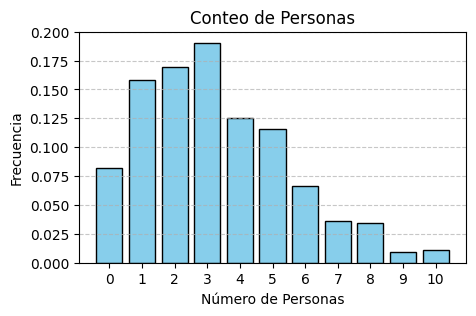

In [15]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(df_counts_prc['people'], df_counts_prc['proportion'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas')
plt.xlabel('Número de Personas')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 11))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Se observa que casi el 20% del tiempo se tiene asistencia de 3 clientes cada 30 minutos.

## Medidas de Tendencia Central

In [16]:
media = raw_df['people'].mean()
mediana = raw_df['people'].median()
moda = raw_df['people'].mode()[0]

print(f"Media: {media}, Mediana: {mediana}, Moda: {moda}")

Media: 3.28, Mediana: 3.0, Moda: 3


## Medidas de Dispersión

In [17]:
varianza = raw_df['people'].var()
desviacion_std = raw_df['people'].std()
rango_intercuartilico = raw_df['people'].quantile(0.75) - raw_df['people'].quantile(0.25)

print(f"Varianza: {varianza:.4f}, Desviación Estándar: {desviacion_std:.3f}, Rango Intercuartílico: {rango_intercuartilico:.3f}")

Varianza: 4.9997, Desviación Estándar: 2.236, Rango Intercuartílico: 3.000


## Percentiles

In [18]:
percentil_25 = raw_df['people'].quantile(0.25)
percentil_75 = raw_df['people'].quantile(0.75)

print(f"Percentil 25: {percentil_25}, Percentil 75: {percentil_75}")

Percentil 25: 2.0, Percentil 75: 5.0


## Pruebas de Hipótesis

In [19]:
from scipy.stats import wilcoxon

In [20]:
# Primero, aplicamos la transformación logarítmica para normalizar los datos
datos_log = np.log(raw_df['people'])

# Luego, realizamos la Prueba de Wilcoxon
# Como solo tenemos una muestra, comparamos contra un valor hipotético, que podría ser la mediana
mediana_hipotetica = np.median(datos_log)

# La prueba requiere dos conjuntos de datos, por lo que restamos la mediana hipotética de nuestros datos logarítmicos
stat, p_valor = wilcoxon(datos_log - mediana_hipotetica)

print(f"Estadístico de Wilcoxon: {stat:.4f}, P-valor: {p_valor:.4f}, mediana de comparacion: {mediana_hipotetica:.4f}")

Estadístico de Wilcoxon: 35676.5000, P-valor: 0.0001, mediana de comparacion: 1.0986


C:\Users\fcopa\anaconda3\envs\integrador\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Análisis de Series Temporales

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# Prueba de Dickey-Fuller para comprobar estacionariedad
resultado_adfuller = adfuller(raw_df['people'])
print(f"Estadístico ADF: {resultado_adfuller[0]:3f}, P-valor: {resultado_adfuller[1]:2e}")

Estadístico ADF: -8.433003, P-valor: 1.848386e-13


Los datos muestran una distribución con una tendencia central alrededor de 3 personas por conteo en cada captura, con una variabilidad moderada. 

La prueba de Wilcoxon confirma que los datos transformados logarítmicamente difieren significativamente de una mediana hipotética, y la prueba de Dickey-Fuller indica que la serie de tiempo es estacionaria. 

Estos resultados son consistentes con una serie de tiempo que tiene una distribución log-normal

# Agragaciones temporales

Las agregaciones temporales en series de tiempo ofrecen varias ventajas clave:

- Reducción del Ruido: Al agrupar datos en intervalos más grandes, se suavizan las fluctuaciones aleatorias, lo que facilita la identificación de tendencias y patrones.
- Eficiencia Computacional: Al disminuir la granularidad de los datos, se reduce el volumen de datos a procesar, lo que puede mejorar la velocidad de cálculo y análisis.
- Mejora en la Visualización: Las agregaciones pueden hacer que los gráficos de series de tiempo sean más legibles y fáciles de interpretar, al presentar la información de manera más clara y concisa.
- Análisis de Tendencias: Facilita el análisis de tendencias a largo plazo al eliminar variaciones estacionales o cíclicas de corto plazo.

*Referencias*
> - Peña, D. (2010). Análisis de series temporales. Madrid: Alianza Editorial

In [23]:
grupos_dic = {}
agrupaciones = ['2h', '4h', 'D', 'W']

for intervalo in agrupaciones:

    grupos_dic[intervalo] = raw_df.resample(intervalo).agg(
        mean=('people', 'mean'),
        sum=('people', 'sum')
    )

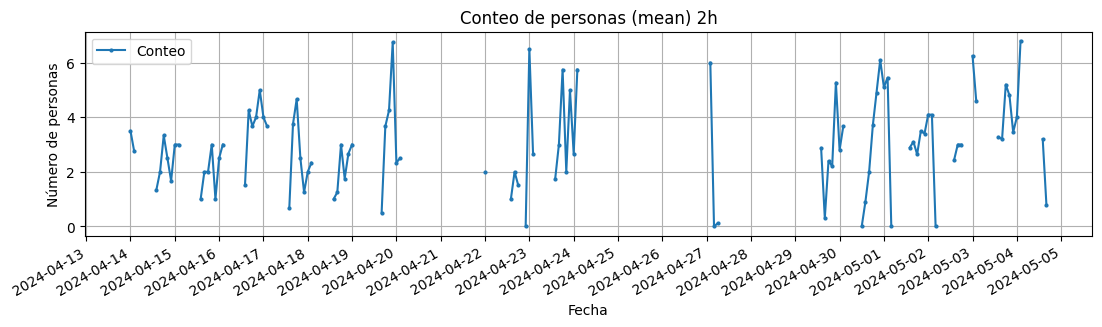

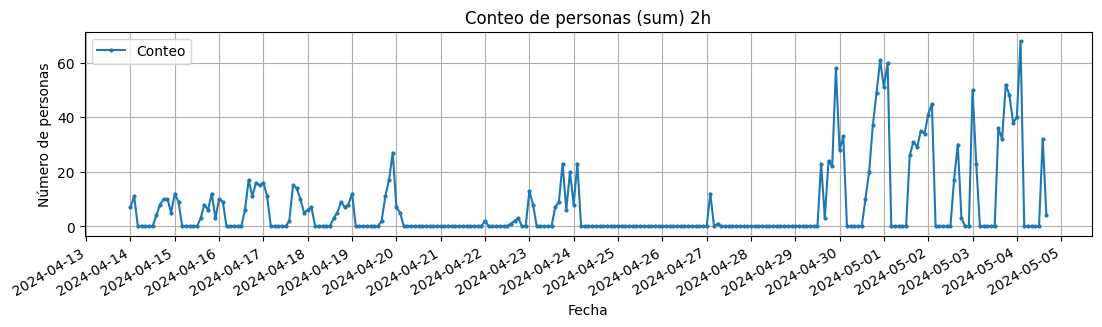

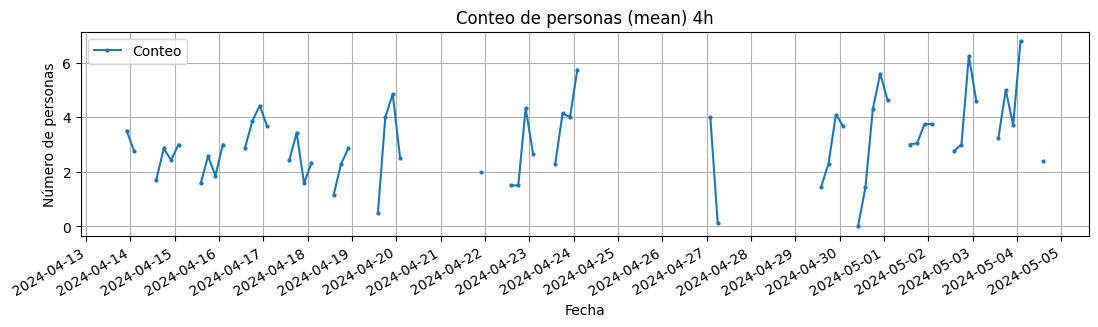

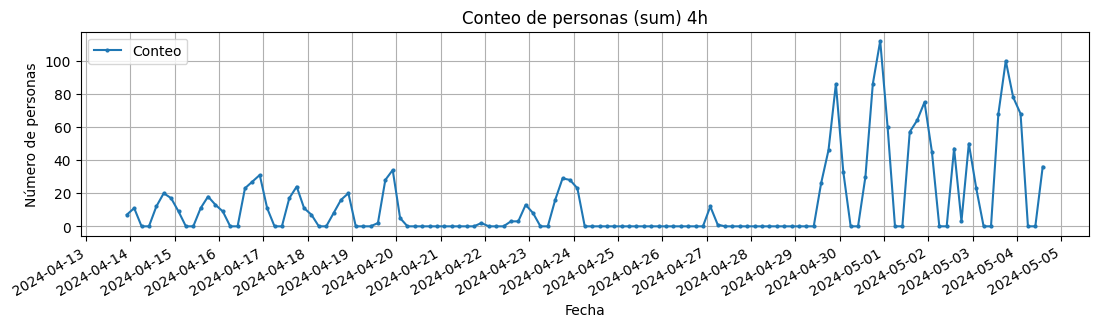

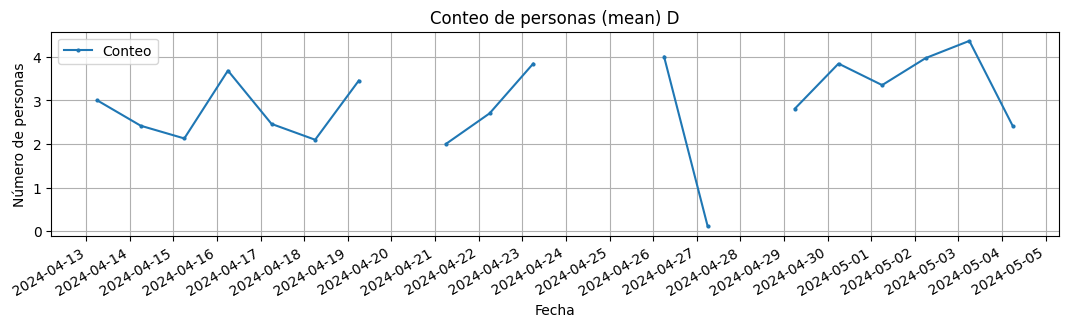

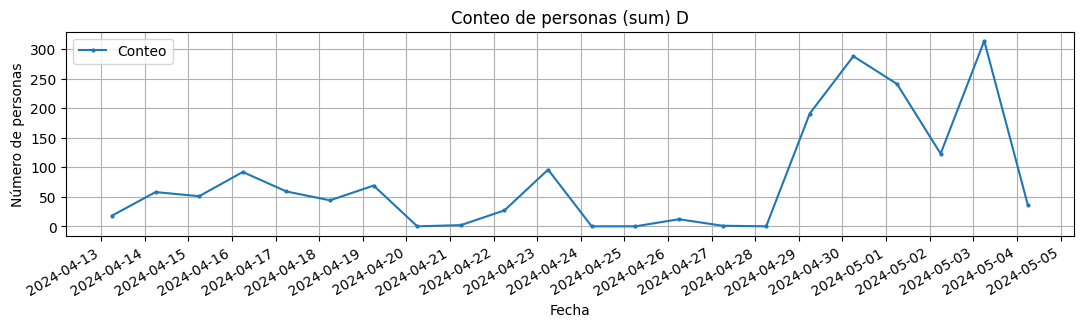

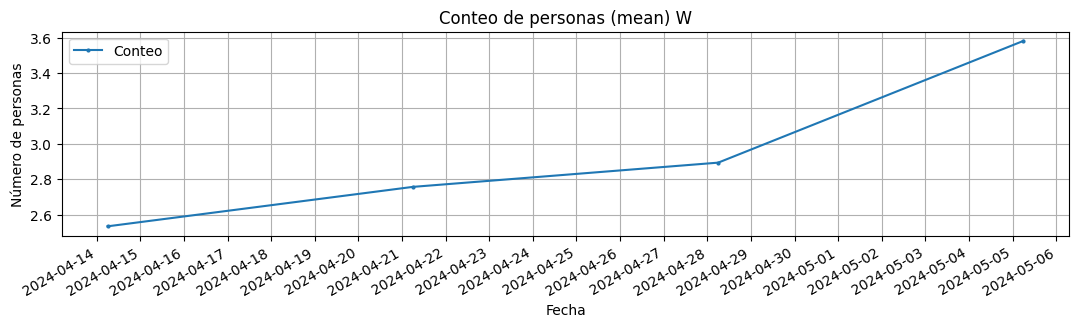

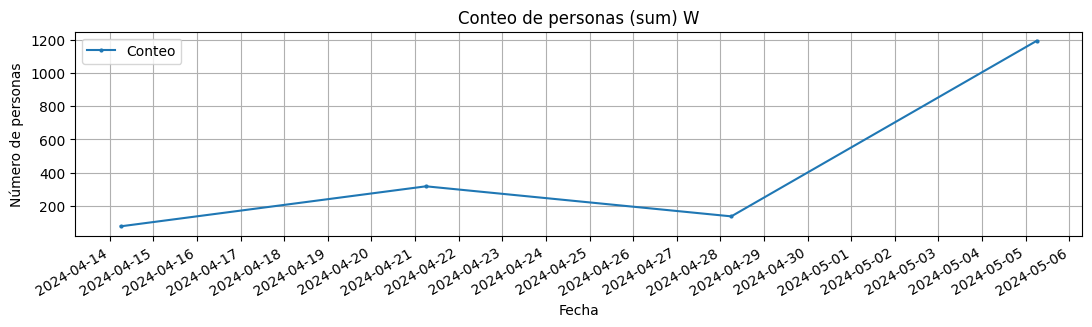

In [24]:
for intervalo in agrupaciones:
    for agg in ['mean','sum']:
        plot_df_counts(grupos_dic[intervalo], grouped=True, agg2plot=agg, intervalo=intervalo)

In [25]:
conteo_por_dia = pd.DataFrame(grupos_dic['D']['sum'].value_counts()).reset_index()

# Definimos los rangos
bins = [0, 50, 100, 150, 200, 250, float('inf')]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', 'Mayor a 250']

# Creamos una nueva columna 'range' que indica el rango al que pertenece cada 'sum'
conteo_por_dia['range'] = pd.cut(conteo_por_dia['sum'], bins=bins, labels=labels, right=False)

# Agrupamos por la nueva columna 'range' y sumamos los 'count'
conteo_diario_por_rango = conteo_por_dia.groupby('range', observed=False)['count'].sum().reset_index()

conteo_diario_por_rango

range  count
0         0-50     11
1       51-100      6
2      101-150      1
3      151-200      1
4      201-250      1
5  Mayor a 250      2

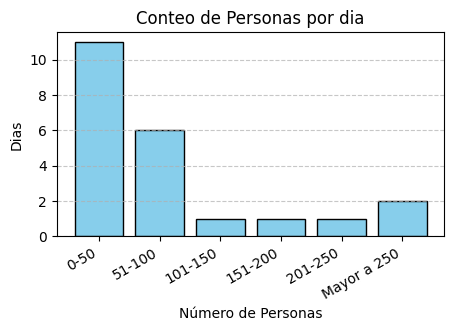

In [26]:
# Crear un gráfico de barras
plt.figure(figsize=(5, 3))
plt.bar(conteo_diario_por_rango['range'], conteo_diario_por_rango['count'], color='skyblue', edgecolor='black', align='center')

# Añadir títulos y etiquetas
plt.title('Conteo de Personas por dia')
plt.xlabel('Número de Personas')
plt.ylabel('Dias')
plt.xticks(range(len(conteo_diario_por_rango)))  # Asegura que el eje x tenga marcas de 0 a 10
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

Puesto que nuestro objetivo principal es analizar la recurrencia diaria de clientes, también podemos agrupar por rangos y contar los días en cada rango. 

Este método puede ser de utilidad para buscar otros comportamientos en el dato.

# Ejemplos de imagenes capturadas

In [27]:
import glob
import cv2 as cv
import tensorflow as tf
import tensorflow_hub as hub

from tqdm import tqdm

In [28]:
objt_detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1")

El modelo `Faster R-CNN Inception ResNet v2 1024x1024` es un modelo de detección de objetos que ha sido entrenado en el conjunto de datos COCO 20171. Este modelo utiliza una red neuronal convolucional profunda como `Inception ResNet v2` como su columna vertebral (backbone) para extraer características de las imágenes. El modelo es capaz de detectar objetos en imágenes escalando las imágenes de entrenamiento a un tamaño de 1024x1024 píxeles.

El proyecto COCO, o Common Objects in Context, es un conjunto de datos de referencia ampliamente utilizado para la evaluación de algoritmos de detección, segmentación y reconocimiento de objetos en imágenes. Contiene más de 200,000 imágenes etiquetadas con 80 categorías de objetos diferentes, lo que lo hace uno de los conjuntos de datos más completos y desafiantes en el campo de la visión por computadora.

El modelo Faster R-CNN es conocido por su eficiencia en la detección de objetos, ya que combina la generación de propuestas de regiones (region proposal network, RPN) y la detección de objetos en una sola red, lo que permite un proceso de detección más rápido y preciso en comparación con métodos anteriores

Referencias

> - Ren, S., He, K., Girshick, R., & Sun, J. (2016). Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks. arXiv preprint arXiv:1506.01497v3. Recuperado de arXiv:1506.01497
> - COCO - Common Objects in context. (n.d.). https://cocodataset.org/#home



## Funciones auxiliares

In [29]:
def get_annotated_img_objects(img, detector_output, score_threshold=0.50, onlyhumans=True):
    """
    Anota objetos detectados en una imagen basándose en la salida de un detector.

    Parámetros:
    img (np.array): La imagen original en la que se detectarán los objetos.
    detector_output (dict): Un diccionario con las salidas del detector, incluyendo clases, cajas y puntuaciones.
    score_threshold (float, opcional): El umbral de puntuación para considerar una detección válida.
    onlyhumans (bool, opcional): Si es True, solo se anotarán detecciones humanas.

    Devuelve:
    tuple: Una tupla conteniendo la imagen anotada, el número de objetos detectados,
           los índices de las detecciones, las cajas detectadas y los tipos de objetos.
    """

    # Extrae la información relevante del output del detector
    class_ids = detector_output.get("detection_classes")[0]
    boxes = detector_output.get("detection_boxes")[0]
    scores = detector_output.get("detection_scores")[0]
    num_detections = int(detector_output.get("num_detections")[0])

    # Convierte la imagen de entrada a un array de numpy y prepara las variables
    image = np.array(img)
    objects = 0
    y_scale, x_scale, _ = image.shape
    ids = []
    object_type = []
    detected_boxes = {}

    # Decide qué objetos se van a anotar
    if onlyhumans:
        objects2plot = [1]  # Solo humanos
    else:
        objects2plot = list(set(class_ids.astype(int)))  # Todos los objetos detectados

    # Itera sobre todas las detecciones
    for i in range(num_detections):
        # Verifica si la detección cumple con el umbral y si es un objeto a anotar
        if scores[i] >= score_threshold and int(class_ids[i]) in objects2plot:
            box = boxes[i]
            y_min, x_min, y_max, x_max = box

            # Dibuja un rectángulo alrededor del objeto detectado
            cv.rectangle(image, (int(x_min*x_scale), int(y_min*y_scale)), 
                         (int(x_max*x_scale), int(y_max*y_scale)), (0, 255, 0), 5)
            objects += 1
            ids.append(i)
            object_type.append(int(class_ids[i]))
            detected_boxes[i] = [(int(x_min*x_scale), int(y_min*y_scale)), 
                                 (int(x_max*x_scale), int(y_max*y_scale))]

    # Devuelve la imagen anotada junto con información sobre las detecciones
    return image, objects, ids, detected_boxes, object_type

In [30]:
def detect_persons(img_list, detector, score_threshold=0.85, plot=True, size=(13,13)):
    """
    Detecta personas en una lista de imágenes utilizando un detector proporcionado.

    Parámetros:
    img_list (list): Lista de rutas de archivos de imágenes para procesar.
    detector (modelo): Modelo de detección de objetos para identificar personas.
    score_threshold (float, opcional): Umbral de puntuación para filtrar detecciones.
    plot (bool, opcional): Si es True, muestra las imágenes con las detecciones.
    size (tuple, opcional): Tamaño de la imagen a mostrar.

    Devuelve:
    dict: Diccionario con imágenes etiquetadas y sus cajas de detección.
    dict: Diccionario con cajas de detección por imagen.
    """

    # Inicializa diccionarios para almacenar resultados
    images_labeled = {}
    boxes_per_image = {}

    # Procesa cada imagen en la lista
    for filename in tqdm(img_list):
        # Lee la imagen y la convierte al espacio de color RGB
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Obtiene la salida del detector para la imagen actual
        detector_output = detector(tf.expand_dims(img, axis=0))
        # Anota la imagen con las detecciones de personas
        img_detect, objects, ids, detected_boxes, object_type = get_annotated_img_objects(img, detector_output, score_threshold=score_threshold)
        # Almacena la imagen anotada y las detecciones en el diccionario
        images_labeled[filename.split("\\")[-1]] = {'img': img_detect, 'boxes':detected_boxes, 'object':object_type}
        boxes_per_image[filename.split("\\")[-1]] = detected_boxes

    # Si se debe mostrar, itera sobre las imágenes etiquetadas y las muestra
    if plot:
        for name, image in images_labeled.items():
            mostrar_imagen(image['img'], cmap='', title=name, size=size)
            
    # Devuelve los diccionarios con las imágenes etiquetadas y las cajas de detección
    return images_labeled, boxes_per_image


In [31]:
def plot_images_in_grid(images_labeled, columns=3, cmap='gray', size=(23, 23)):
    """
    Muestra una cuadrícula de imágenes con anotaciones.

    Parámetros:
    images_labeled (dict): Un diccionario con nombres de imágenes y sus datos correspondientes.
    columns (int, opcional): Número de columnas en la cuadrícula.
    cmap (str, opcional): Mapa de colores para mostrar las imágenes.
    size (tuple, opcional): Tamaño de la figura en pulgadas.

    Devuelve:
    None: Esta función no devuelve nada, solo muestra las imágenes en una cuadrícula.
    """

    # Calcula el número total de imágenes
    total_images = len(images_labeled)
    
    # Calcula el número de filas necesarias
    rows = total_images // columns + (total_images % columns > 0)
    
    # Configura el tamaño de la figura basado en el número de filas y columnas
    plt.figure(figsize=(size[0], size[1] * rows))
    
    # Itera a través de las imágenes y sus nombres
    for index, (name, image) in enumerate(images_labeled.items()):
        # Crea un subplot para cada imagen
        plt.subplot(rows, columns, index + 1)
        # Muestra la imagen con o sin un mapa de colores
        if cmap == "":
            plt.imshow(image['img'])
        else:
            plt.imshow(image['img'], cmap)
        # Cuenta el número de objetos detectados
        n_counts = len(image['object'])
        # Define el título con el nombre y el número de personas detectadas
        title = f'{name}\nPersonas detectadas: {n_counts}'
        plt.title(title, fontsize=10)
        plt.axis('off')  # Oculta los ejes
    
    plt.tight_layout()  # Ajusta la disposición de los subplots
    plt.show()  # Muestra la cuadrícula con todas las imágenes


## Seleccion de imagenes a desplegar

In [32]:
import random

In [33]:
imgs_path = '../../../data/raw/imgs/downloaded_images/selected_images'

filenames_list = glob.glob(imgs_path + "\/*.jpg")

subset = 12
random_sample = sorted(list(random.sample(filenames_list, subset)))

In [34]:
images_labeled, boxes_per_image = detect_persons(random_sample, objt_detector, plot=False)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:20<00:00,  1.72s/it]


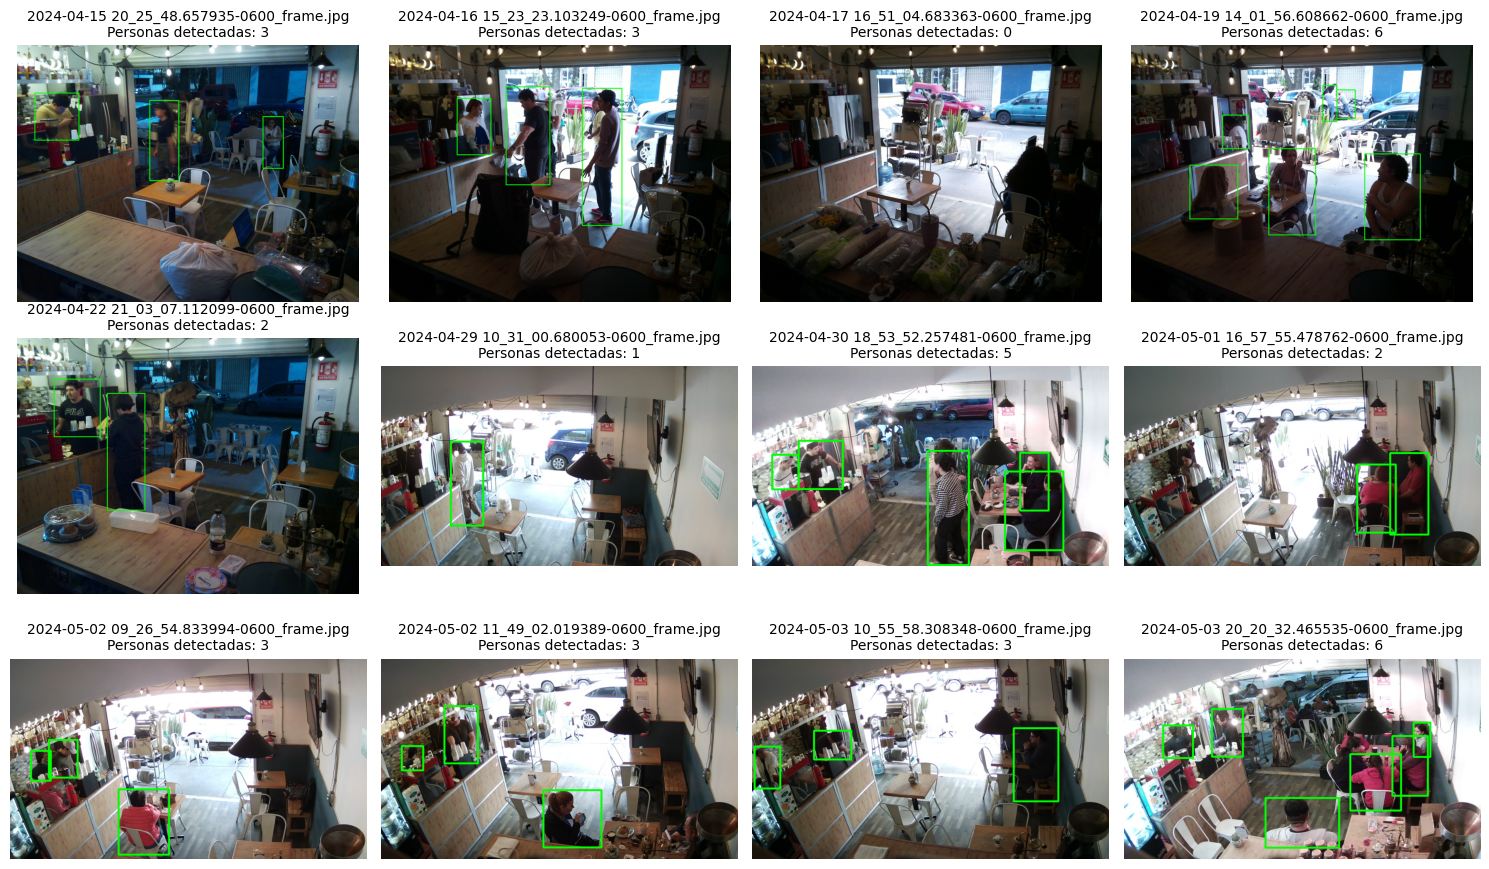

In [35]:
plot_images_in_grid(images_labeled, columns=4, size=(15,3))

Utilizando el modelo `Faster R-CNN Inception ResNet v2 1024x1024`, como motor de detección de objetos, podemos identificar a las personas que aparecen en el cuadro de detección de la cámara. 
Utilizando un filtro para únicamente contar personas(humanos) el cual está identificado en el id de `detection_classes` podemos poblar la tabla de observaciones.

El modelo es bastante robusto y se observa un conteo adecuado en la mayoría de los ejemplos. Sin embargo, observamos que también es capaz de detectar personas en el exterior del establecimiento, por enfrente de la calle, lo cual no son clientes del establecimiento. Este comportamiento podría generar un sesgo en el conteo.
